In [98]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [99]:
#load datasets
train = pd.read_csv("../data/Train_SU63ISt.csv") 
test = pd.read_csv("../data/Test_0qrQsBZ.csv")

In [100]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [101]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

## Preprocessing

In [102]:
#parse feature from object to datetime
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

In [103]:
#extract date parts from datetime
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour
    i['day_of_week'] = i.Datetime.dt.dayofweek
    i['weekend'] = np.where((i['day_of_week']==5) | (i['day_of_week']==6) ,1 , 0)

In [104]:
train.tail()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [105]:
train.set_index('Datetime', inplace = True)
test.set_index('Datetime', inplace = True)

In [106]:
train.drop('ID', 1, inplace = True)
test.drop('ID', 1, inplace = True)

In [107]:
train.head()

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [108]:
#creating a datasets copy
train_original=train.copy() 
test_original=test.copy()

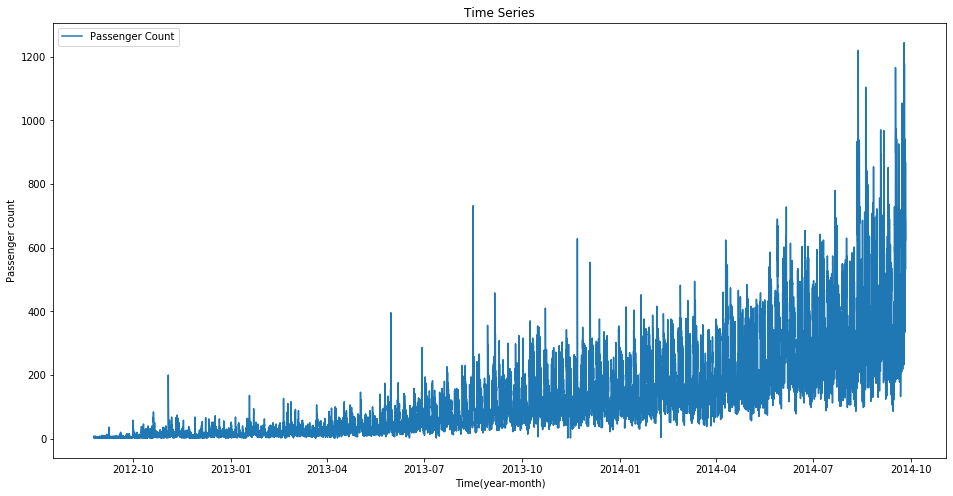

In [109]:
ts = train['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')
_=plt.show

## Exploratory analysis

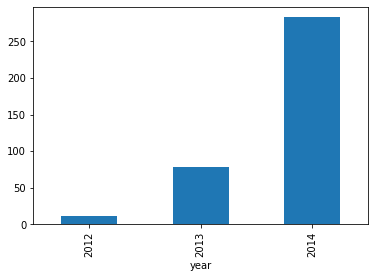

In [110]:
#Yearly
#First hypothesis was traffic will increase as the years pass by.
_=train.groupby('year')['Count'].mean().plot.bar()

Above we can observe a exponential increase

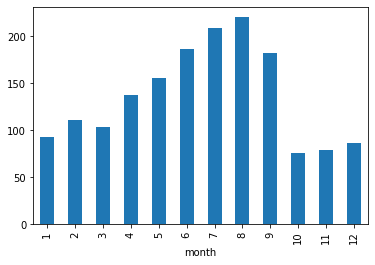

In [111]:
# Monthly
# second hypothesis was about increase in traffic from May to October
_=train.groupby('month')['Count'].mean().plot.bar()

Grouping by month, we can observe a high decrease after october.
That doesn't seem right

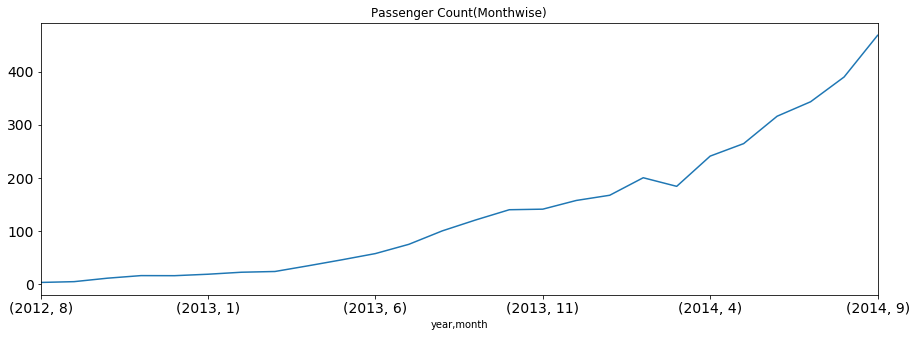

In [112]:
_=train.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

Here it is! We don't have data for month 10,11,12

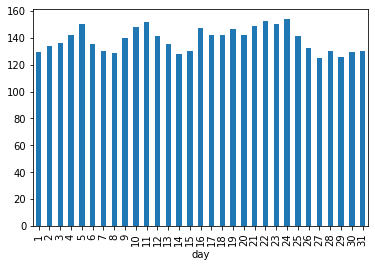

In [113]:
_=train.groupby('day')['Count'].mean().plot.bar()

There aren't much insights from day wise count

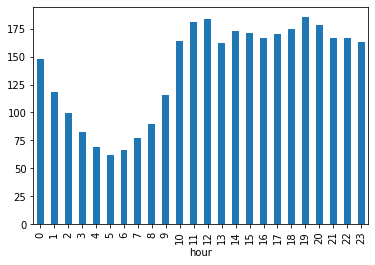

In [114]:
_=train.groupby('hour')['Count'].mean().plot.bar()

now we can obsserve some peak at 11 to 12 and 19 

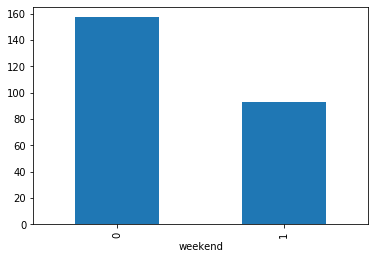

In [115]:
_=train.groupby('weekend')['Count'].mean().plot.bar()

From the above plot, we can observe more traffic at weekdays (0) instead weekend days

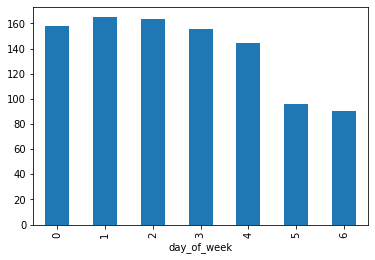

In [117]:
_=train.groupby('day_of_week')['Count'].mean().plot.bar()

Now we can reafirm the hyposteses that are more trafic in weekdays

Let's look time series at hourly, daily, weekly and monthly

In [118]:
Hourly = train.resample('H').mean()
Daily = train.resample('D').mean()
Weekly = train.resample('W').mean()
Monthly = train.resample('M').mean()

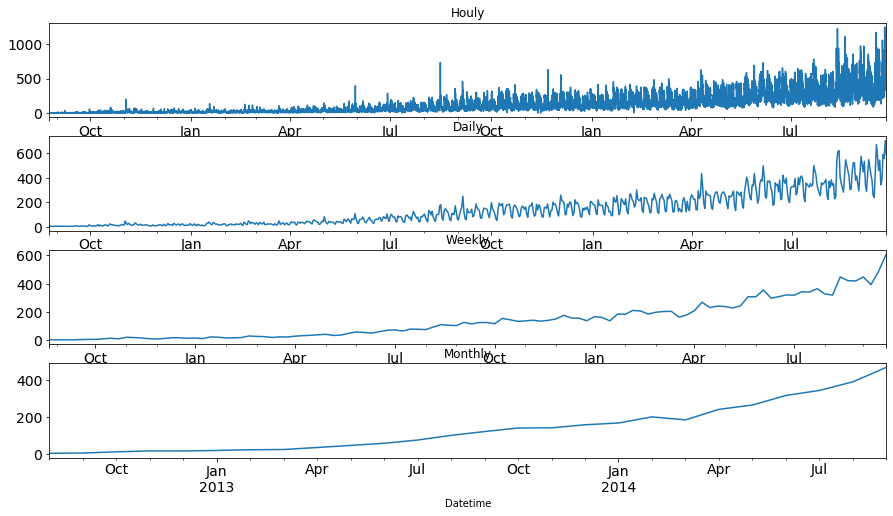

In [119]:
fig, axs = plt.subplots(4,1)

Hourly.Count.plot(figsize = (15,8), title = 'Houly', fontsize = 14, ax=axs[0])
Daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax=axs[1])
Weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax=axs[2])
Monthly.Count.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax=axs[3])
_=plt.show()

In [120]:
train = train.resample('D').mean()
test  = test.resample('D').mean()

Now we split train dataset into 2 other   Train and Vaild

In [121]:
Train = train.loc['2012-08-25':'2014-06-24'] 
Valid = train.loc['2014-06-25':'2014-09-25']

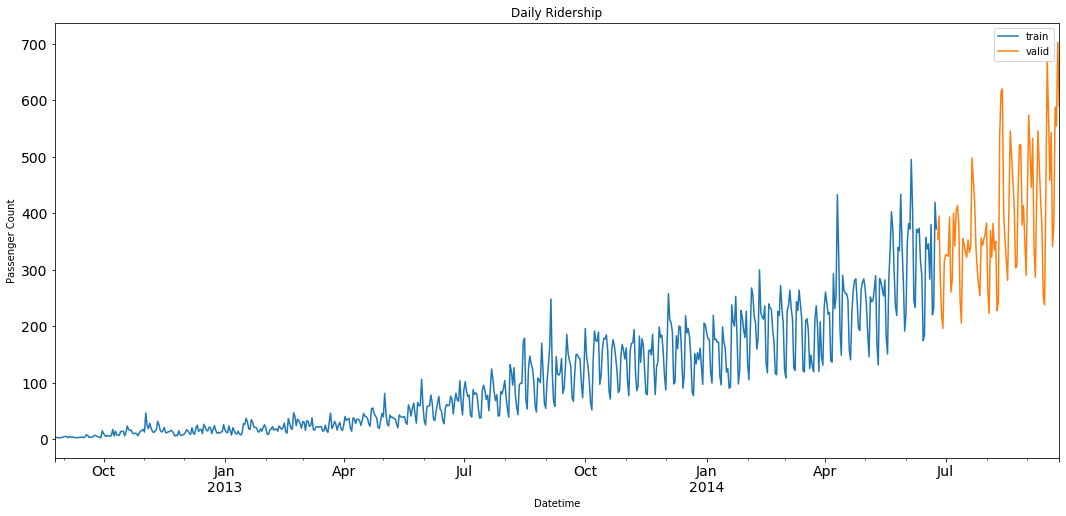

In [128]:
Train.Count.plot(figsize=(18,8), title='Daily Ridership', fontsize= 14, label='train')
Valid.Count.plot(figsize=(18,8), title='Daily Ridership', fontsize= 14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Passenger Count")
plt.legend(loc='best') 
_=plt.show()

Above we note all timeserie. We will predict the orange part and use this plot to validate
If all things occur correctly, we will make predictions for the test dataset